# Stock Trading

The cell below defines the **abstract class** whose API you need to implement. **Do NOT modify it** - use the dedicated cell further below for your implementation instead.

In [ ]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  
      

# abstract class to represent a stock trading platform
class AbstractStockTradingPlatform(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # adds transactionRecord to the set of completed transactions
    @abstractmethod
    def logTransaction(self, transactionRecord):
        pass

    # returns a list with all transactions of a given stockName,
    # sorted by increasing trade value. 
    # stockName : str
    @abstractmethod
    def sortedTransactions(self, stockName): 
        sortedList = []
        return sortedList    
    
    # returns a list of transactions of a given stockName with minimum trade value
    # stockName : str
    @abstractmethod
    def minTransactions(self, stockName): 
        minList = []
        return minList    
    
    # returns a list of transactions of a given stockName with maximum trade value
    # stockName : str
    @abstractmethod
    def maxTransactions(self, stockName): 
        maxList = []
        return maxList    

    # returns a list of transactions of a given stockName, 
    # with the largest trade value below a given thresholdValue.  
    # stockName : str
    # thresholdValue : double
    @abstractmethod
    def floorTransactions(self, stockName, thresholdValue): 
        floorList = []
        return floorList    

    # returns a list of transactions of a given stockName, 
    # with the smallest trade value above a given thresholdValue.  
    # stockName : str
    # thresholdValue : double
    @abstractmethod
    def ceilingTransactions(self, stockName, thresholdValue): 
        ceilingList = []
        return ceilingList    

        
    # returns a list of transactions of a given stockName,  
    # whose trade value is within the range [fromValue, toValue].
    # stockName : str
    # fromValue : double
    # toValue : double
    @abstractmethod
    def rangeTransactions(self, stockName, fromValue, toValue): 
        rangeList = []
        return rangeList     

Use the cell below to define any data structure and auxiliary python function you may need. Leave the implementation of the main API to the next code cell instead.

In [ ]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE

class Node(object):
    def __init__(self, val):
        self.tval = val[1]*val[2]  #trade value
        self.data = [val]          #a list holding detail information
        self.left = None
        self.right = None
        self.height = 1
 
#AVL Tree data type, self-balancing tree
class AVL(object):
    
    def __init__(self):
        self.max = None
        self.min = None

    # logTransaction
    def insert(self, root, data, rf, c):
        #rf:where to insert? right = 0/left = 1/no = 2;
        #c means if the left and right is continuous 0/1 true/false 2:first insertion
        right = 0
        left = 1
        no = 2
        first = 2
        key = data[1] * data[2]

        if not root: 
            if c == 1:
                if rf == left: #if it is left most node
                    self.min = Node(data) 
                    return self.min
                elif rf == right: #if it is right most node
                    self.max = Node(data)
                    return self.max
            return Node(data)

        elif key < root.tval: #smaller goes left
            if c == first:c = 1
            elif c == 1 and rf == left:c = 1 
            else:c = 0
            #continuous for 1 other for 0
            root.left = self.insert(root.left, data, left, c)
        elif key > root.tval: #larger goes right
            if c == first:c = 1
            elif c == 1 and rf == right:c = 1
            else:c = 0
            root.right = self.insert(root.right, data, right, c)
        elif key == root.tval: #throw all the duplicates into a list
            root.data.append(data)
    
        
        root.height = 1 + max(self.getHeight(root.left),
                        self.getHeight(root.right))
    
        
        balance = self.getBalance(root)
    
        # Case 1 - Left Left
        if balance > 1 and key < root.left.tval:
            return self.rightRotate(root)
    
        # Case 2 - Right Right
        if balance < -1 and key > root.right.tval:
            return self.leftRotate(root)
    
        # Case 3 - Left Right
        if balance > 1 and key > root.left.tval:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)
    
        # Case 4 - Right Left
        if balance < -1 and key < root.right.tval:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)
    
        return root
    
    def leftRotate(self, z):
    
        y = z.right
        T2 = y.left
    
        # Perform rotation
        y.left = z
        z.right = T2
    
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                        self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                        self.getHeight(y.right))
    
        # Return the new root
        return y
    
    def rightRotate(self, z):
    
        y = z.left
        T3 = y.right
    
        # Perform rotation
        y.right = z
        z.left = T3
    
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                        self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                        self.getHeight(y.right))
    
        # Return the new root
        return y
    
    def getHeight(self, root):
        if not root:
            return 0
    
        return root.height
    
    # Find balancing factor for rotations
    def getBalance(self, root):
        if not root:
            return 0
    
        return self.getHeight(root.left) - self.getHeight(root.right)
    
    
    # Returns all nodes of tree in order
    def inOrder(self, root):
        list = []
        if root:
            list = self.inOrder(root.left)
            list.append(root.data)
            list = list + self.inOrder(root.right)
        return list

    def minTransactions(self):
        if self.min != None: return self.min.data
        else: return [] #none then return empty list avoid 'no attribute' error
 
    def maxTransactions(self):
        if self.min != None: return self.max.data
        else: return [] #none then return empty list avoid 'no attribute' error
 
    def floorTransactions(self, root, threshold):
        if not root:
            return 0
        if (root.tval == threshold):
            return root.data
        
        if (root.tval > threshold):
            return self.floorTransactions(root.left, threshold)
        
        floorTransaction = self.floorTransactions(root.right, threshold)
        if (floorTransaction == 0):
            return root.data
        else:
            return floorTransaction
    
    def ceilingTransactions(self, root, threshold):
        if not root:
            return 0
        if (root.tval == threshold):
            return root.data
        
        if (root.tval < threshold):
            return self.ceilingTransactions(root.right, threshold)
        
        ceilingTransaction = self.ceilingTransactions(root.left, threshold)
        if (ceilingTransaction == 0):
            return root.data
        else:
            return ceilingTransaction


    def rangeTransactions(self, root, fromValue, toValue):
        l1 = []
        if root is not None:
            if fromValue <= root.tval:
                l1 = l1 + self.rangeTransactions(root.left, fromValue, toValue)

            if fromValue <= root.tval and toValue >= root.tval:
                l1.append(root.data)

            if root.tval <= toValue:
                l1 = l1 + self.rangeTransactions(root.right, fromValue, toValue)

        return l1
        
count = 0 #count for recursives(flooring ceiling sorting)
count_insert = 0 
count_rotation = 0
# specific class for recording function calls (not used in the main code)
#everything remains except adding 'recording purpose' command lines
# only for experimental purposes
class Node1(object):
    def __init__(self, val):
        self.tval = val[1]*val[2]  #trade value
        self.data = [val]          #a list holding detail information
        self.left = None
        self.right = None
        self.height = 1
 
#AVL Tree data type, self-balancing tree
class AVL1(object):
    
    def __init__(self):
        self.max = None
        self.min = None

    def insert(self, root, data, rf, c):
        global count_insert,count_rotation
        #rf:right = 0/left = 1/no = 2;
        #c means if the left and right is continuous 0/1 true/false 2:first insertion
        right = 0
        left = 1
        no = 2
        first = 2
        key = data[1] * data[2]

        if not root: 
            if c == 1:
                if rf == left: #if it is left most node
                    self.min = Node1(data) 
                    return self.min
                elif rf == right: #if it is right most node
                    self.max = Node1(data)
                    return self.max
            return Node1(data)

        elif key < root.tval:
            if c == first:c = 1
            elif c == 1 and rf == left:c = 1 
            else:c = 0
            #continuous for 1 other for 0
            count_insert += 1
            root.left = self.insert(root.left, data, left, c)
        elif key > root.tval:
            if c == first:c = 1
            elif c == 1 and rf == right:c = 1
            else:c = 0
            count_insert += 1
            root.right = self.insert(root.right, data, right, c)
        elif key == root.tval: #throw all the duplicates into a list
            root.data.append(data)
    
        
        root.height = 1 + max(self.getHeight(root.left),
                        self.getHeight(root.right))
    
        
        balance = self.getBalance(root)
    
        # Case 1 - Left Left
        if balance > 1 and key < root.left.tval:
            return self.rightRotate(root)
    
        # Case 2 - Right Right
        if balance < -1 and key > root.right.tval:
            return self.leftRotate(root)
    
        # Case 3 - Left Right
        if balance > 1 and key > root.left.tval:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)
    
        # Case 4 - Right Left
        if balance < -1 and key < root.right.tval:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)
    
        return root
    
    def leftRotate(self, z):
        global count_rotation
        count_rotation = count_rotation + 1

        y = z.right
        T2 = y.left
    
        # Perform rotation
        y.left = z
        z.right = T2
    
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                        self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                        self.getHeight(y.right))
    
        # Return the new root
        return y
    
    def rightRotate(self, z):
        global count_rotation
        count_rotation = count_rotation + 1

        y = z.left
        T3 = y.right
    
        # Perform rotation
        y.right = z
        z.left = T3
    
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                        self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                        self.getHeight(y.right))
    
        # Return the new root
        return y
    
    def getHeight(self, root):
        if not root:
            return 0
    
        return root.height
    
    def getBalance(self, root):
        if not root:
            return 0
    
        return self.getHeight(root.left) - self.getHeight(root.right)
    
    
    def inOrder(self, root):
        global count
        list = []
        if root:
            count = count + 1
            list = self.inOrder(root.left)
            list.append(root.data)
            list = list + self.inOrder(root.right)

        return list

    def minTransactions(self):
        if self.min != None: return self.min.data
        else: return [] #none then return empty list avoid 'no attribute' error
 
    def maxTransactions(self):
        if self.min != None: return self.max.data
        else: return [] #none then return empty list avoid 'no attribute' error
    
    def floorTransactions(self, root, threshold):
        global count

        if not root:
            return 0
        if (root.tval == threshold):
            return root.data
        
        if (root.tval > threshold):
            count = count + 1
            return self.floorTransactions(root.left, threshold)

        count = count + 1
        floorTransaction = self.floorTransactions(root.right, threshold)
        if (floorTransaction == 0):
            return root.data
        else:
            count = count + 1
            return floorTransaction
 
    def ceilingTransactions(self, root, threshold):
        global count
        if not root:
            return 0
        if (root.tval == threshold):
            return root.data
        
        if (root.tval < threshold):
            count = count + 1
            return self.ceilingTransactions(root.right, threshold)
        
        count = count + 1
        ceilingTransaction = self.ceilingTransactions(root.left, threshold)
        if (ceilingTransaction == 0):
            return root.data
        else:
            count = count + 1
            return ceilingTransaction


    def rangeTransactions(self, root, fromValue, toValue):
        l1 = []
        global count
        if root is not None:
            if fromValue <= root.tval:
                count = count + 1
                l1 = l1 + self.rangeTransactions(root.left, fromValue, toValue)

            if fromValue <= root.tval and toValue >= root.tval:
                l1.append(root.data)

            if root.tval <= toValue:
                count = count + 1
                l1 = l1 + self.rangeTransactions(root.right, fromValue, toValue)

        return l1

Use the cell below to implement the requested API. 

In [ ]:
# IMPLEMENT HERE THE REQUESTED API

class StockTradingPlatform:
   
    def __init__(self):
        # ADD YOUR CODE HERE
        #symbol table for holding trees roots and index
        self.roots = [None,None,None,None,None,None,None,None,None,None,None,None]
        self.trees = [AVL(),AVL(),AVL(),AVL(),AVL(),AVL(),AVL(),AVL(),AVL(),AVL(),AVL(),AVL()]
        self.banks = ["Barclays", "HSBA", "Lloyds Banking Group", "NatWest Group",
                      "Standard Chartered", "3i", "Abrdn", "Hargreaves Lansdown",
                      "London Stock Exchange Group", "Pershing Square Holdings",
                      "Schroders", "St. James's Place plc."]
        self.balance = []   #used in calculating the time complexity for worst case     
       
 
    def logTransaction(self, transactionRecord):
        # ADD YOUR CODE HERE
        index1 = self.banks.index(transactionRecord[0])
        self.roots[index1] = self.trees[index1].insert(self.roots[index1], transactionRecord, 2, 2)
        #see AVL class for the meaning of 2          
 
 
    def sortedTransactions(self, stockName):
        sortedList = []
        # ADD YOUR CODE HERE
        index1 = self.banks.index(stockName)
        root = self.roots[index1]
        tree = self.trees[index1]
        sortedList = tree.inOrder(root)  
         
        return sortedList    
 
   
    def minTransactions(self, stockName):
        minList = []
        # ADD YOUR CODE HERE
        index1 = self.banks.index(stockName)
        tree = self.trees[index1]
        minList = tree.minTransactions()
       
        return minList    
   
    def maxTransactions(self, stockName):
        maxList = []
        # ADD YOUR CODE HERE
        index1 = self.banks.index(stockName)
        tree = self.trees[index1]
        maxList = tree.maxTransactions()  
       
        return maxList    
 
    def floorTransactions(self, stockName, thresholdValue):
        floorList = []
        # ADD YOUR CODE HERE
        index1 = self.banks.index(stockName)
        root = self.roots[index1]
        tree = self.trees[index1]
        floorList = tree.floorTransactions(root, thresholdValue)  
       
        return floorList    
 
    def ceilingTransactions(self, stockName, thresholdValue):
        ceilingList = []
        # ADD YOUR CODE HERE
        index1 = self.banks.index(stockName)
        root = self.roots[index1]
        tree = self.trees[index1]
        ceilingList = tree.ceilingTransactions(root, thresholdValue)
       
        return ceilingList    
 
   
    def rangeTransactions(self, stockName, fromValue, toValue): 
        rangeList = []
        # ADD YOUR CODE HERE
        index1 = self.banks.index(stockName)
        root = self.roots[index1]
        tree = self.trees[index1]
        rangeList = tree.rangeTransactions(root, fromValue, toValue)   
            
        return rangeList    
   

The cell below provides helper code that you can use within your experimental framework to generate random transaction data. **Do NOT modify it**.

In [ ]:
# DO NOT MODIFY THIS CELL

import random
from datetime import timedelta
from datetime import datetime

class TransactionDataGenerator:
    def __init__(self):
        self.stockNames = ["Barclays", "HSBA", "Lloyds Banking Group", "NatWest Group", 
                      "Standard Chartered", "3i", "Abrdn", "Hargreaves Lansdown", 
                      "London Stock Exchange Group", "Pershing Square Holdings", 
                      "Schroders", "St. James's Place plc."]
        self.minTradeValue = 500.00
        self.maxTradeValue = 100000.00
        self.startDate = datetime.strptime('1/1/2022 1:00:00', '%d/%m/%Y %H:%M:%S')
        random.seed(20221603)
          
    # returns the name of a traded stock at random
    def getStockName(self):
        return random.choice(self.stockNames)

    # returns the trade value of a transaction at random
    def getTradeValue(self):
        return round(random.uniform(self.minTradeValue, self.maxTradeValue), 2)
    
    # returns a list of N randomly generated transactions,
    # where each transaction is represented as a list [stock name, price, quantity, timestamp]
    # N : int
    def generateTransactionData(self, N):   
        listTransactions = [[]]*N
        listDates = [self.startDate + timedelta(seconds=3*x) for x in range(0, N)]
        listDatesFormatted = [x.strftime('%d/%m/%Y %H:%M:%S') for x in listDates]
        for i in range(N):
            stockName = random.choice(self.stockNames)
            price = round(random.uniform(50.00, 100.00), 2)
            quantity = random.randint(10,1000)
            listTransactions[i] = [stockName, price, quantity, listDatesFormatted[i]]   
        return listTransactions

Use the cell below for the python code needed to realise your **experimental framework** (i.e., to generate test data, to instante the `StockTrading` class, to thorouhgly experiment with its API functions, and to experimentally measure their performance). You may use the previously provided ``TransactionDataGenerator`` class to generate random transaction data.

In [ ]:
import random
import timeit

# ADD YOUR EXPERIMENTAL FRAMEWORK CODE HERE
#================================Worst Case Test And Generate========================================
numTransactions = 1000002
testPlatform = StockTradingPlatform()
testDataGen = TransactionDataGenerator()

#convert to specific tree class for recording function calls
testPlatform.trees = [AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1()]

testData = testDataGen.generateTransactionData(numTransactions)

#list holding the number of function calls
l_loginsertion = []
l_logrotation = []
l_range_temp = [] #1d array here as the worst case is linear, little different from below
l_nodes = [] #list holding number of tree nodes

a = 0 #record value cycles

while a < 1000001:
        a = a + 1
        if a == 10000 or a ==100000 or a ==1000000: 
            #data record for the 10000th 100000th 1000000th cycle
            #large value to avoid getting empty list after filteration as seed needs to be constant

            #put balance value of each tree in a list
            for i in range(len(testPlatform.banks)):
                testPlatform.balance.append(testPlatform.trees[i].getBalance(testPlatform.roots[i]))

            #collect trees with balance value -1 and 1
            testDataGen.stockNames = []
            for i in range(len(testPlatform.banks)):
                if testPlatform.balance[i] == 1 or testPlatform.balance[i] == -1:
                    testDataGen.stockNames.append(testPlatform.banks[i])

            count_insert = 1 #first call should also be taken into account
            testPlatform.logTransaction(testData[a])
            l_loginsertion.append(count_insert) 
            l_logrotation.append(count_rotation) 
            count_insert = 0
            count_rotation = 0

            #recover stock names after finish the process
            testDataGen.stockNames = ["Barclays", "HSBA", "Lloyds Banking Group", "NatWest Group", 
                      "Standard Chartered", "3i", "Abrdn", "Hargreaves Lansdown", 
                      "London Stock Exchange Group", "Pershing Square Holdings", 
                      "Schroders", "St. James's Place plc."]

        else:
            testPlatform.logTransaction(testData[a])
            count_insert = 0
            count_rotation = 0

    
print("Examples of transactions:", testData[0], testData[numTransactions//2], testData[numTransactions-1])
print("\n++++++++++++++++++Worst Case++++++++++++++++++++++++++")
print("\nnumber of function calls for 10000th 100000th 1000000th cycle:")
print("\nlogTransaction in worst scenario:")
print("insertion:",l_loginsertion,"rotation:",l_logrotation)
print("sum of these two:")
for i in range(len(l_logrotation)):
    print(l_loginsertion[i] + l_logrotation[i],end = ' ')



#print and check balance value of tree we got
#for name in testDataGen.stockNames:
#    print(testPlatform.balance[testPlatform.banks.index(name)])

#in worst case all the function will be in similar condition,so only test for logTransaction will be enough

#situation for range is a little different,the worst case for range is linear as the range is the whole list
#This made it similar to sorted
testPlatform = StockTradingPlatform()
testDataGen = TransactionDataGenerator()

#convert to specific tree class for recording function calls
testPlatform.trees = [AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1()]

#recording function calls
numTransactions = 1000002
a = 0 #record value cycles

t = testDataGen.getTradeValue()
stockname = testDataGen.getStockName()
testData = testDataGen.generateTransactionData(numTransactions)


while a < 1000001:
        a = a + 1
        if a == 10 or a == 100 or a == 1000 or a == 10000 or a ==100000 or a ==1000000:
            #data record for the 10th 100th 1000th 10000th 100000th 1000000th cycle

            count_insert = 1 #first call should also be taken into account
            testPlatform.logTransaction(testData[a])
            l_loginsertion.append(count_insert) 
            l_logrotation.append(count_rotation) 
            count_insert = 0
            count_rotation = 0

            output = testPlatform.sortedTransactions(stockname)
            count = 0  #recover count to 0
            l_nodes.append(len(output)) #collect the number of nodes
            
            #record for range
            count = 1
            output = testPlatform.rangeTransactions(stockname, 500, 100000) #500,100000 should output the whole list similar to sorted
            l_range_temp.append(count)
            count = 0

        else:
            testPlatform.logTransaction(testData[a])
            #remember to make these two counter 0 every time after using the function
            count_insert = 0  
            count_rotation = 0

#output number of function calls
count_insert = 0  
count_rotation = 0
count = 0
print("\nnumber of function calls for 10th 100th 1000th 10000th 100000th 1000000th cycle:")
print("\nnumber of nodes(n) in the tree:",l_nodes)
print("\nrangeTransactions in worst scenario:",l_range_temp)



#================================TEST For Average========================================

testPlatform = StockTradingPlatform()
testDataGen = TransactionDataGenerator()

#convert to specific tree class for recording function calls
testPlatform.trees = [AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1(),AVL1()]

#recording function calls
numTransactions = 1000002
a = 0 #record value cycles

t = testDataGen.getTradeValue()
stockname = testDataGen.getStockName()
testData = testDataGen.generateTransactionData(numTransactions)

#list holding the number of function calls
l_loginsertion = []
l_logrotation = []
l_sorted = []
l_floor = []
l_ceiling = []

l_range = [[]]  #2d array can illustrate the feature more specific as it is not simple n or logn relationship
l_range_temp = []

l_nodes = [] #list holding number of nodes in AVL Tree

while a < 1000001:
        a = a + 1
        if a == 10 or a == 100 or a == 1000 or a == 10000 or a ==100000 or a ==1000000:
            #data record for the 10th 100th 1000th 10000th 100000th 1000000th cycle
            count_insert = 1 #first call should also be taken into account
            testPlatform.logTransaction(testData[a])
            l_loginsertion.append(count_insert) 
            l_logrotation.append(count_rotation) 
            count_insert = 0
            count_rotation = 0

            output = testPlatform.sortedTransactions(stockname)
            l_sorted.append(count)  #collect the number of function calls in the list
            count = 0  #recover count to 0
            l_nodes.append(len(output)) #collect the number of nodes

            count = 1
            output = testPlatform.floorTransactions(stockname, t)
            l_floor.append(count)
            count = 0

            count = 1
            output = testPlatform.ceilingTransactions(stockname, t)
            l_ceiling.append(count)
            count = 0

            for i in range(20):
                count = 1
                rangeValues = sorted([testDataGen.getTradeValue(), testDataGen.getTradeValue()])
                output = testPlatform.rangeTransactions(stockname, rangeValues[0], rangeValues[1])
                l_range_temp.append(count)
                count = 0
            l_range_temp.sort()
            l_range.append(l_range_temp)
            l_range_temp = [] #reset the temp list to empty after usage

        else:
            testPlatform.logTransaction(testData[a])
            #remember to make these two counter 0 every time when using the function
            count_insert = 0  
            count_rotation = 0

#output number of function calls
count_insert = 0  
count_rotation = 0
count = 0
print("\n++++++++++++++++++Average Case++++++++++++++++++++++++++")
print("time record for the 100th 1000th 10000th 100000th 1000000th cycle:")
print("number of nodes(n) in the tree:",l_nodes)
print("\nnumber of function calls for:")
print("\nlogTransaction:")
print("insertion:",l_loginsertion,"rotation:",l_logrotation)
print("sum of these two:")
for i in range(len(l_logrotation)):
    print(l_loginsertion[i] + l_logrotation[i],end = ' ')

print("\n\nsortedTransaction:",l_sorted)
print("floorTransactions:",l_floor)
print("ceilingTransactions:",l_ceiling)
print("rangeTransactions:")
for i in l_range:
    print(i)


testPlatform = StockTradingPlatform() #reset it so as to use normal AVL Tree class
#record time consumption
finaltime_log = []
finaltime_sort = []
finaltime_max = []
finaltime_min = []
finaltime_floor = []
finaltime_ceiling = []
finaltime_range = [[]]
finaltime_range_temp = []

#get time
for j in range(1,1000001):
    #test for time per log
    starttime = timeit.default_timer()
    testPlatform.logTransaction(testData[j])
    endtime = timeit.default_timer()
    finaltime = round(endtime-starttime,10)

    if j == 10 or j == 100 or j == 1000 or j == 10000 or j ==100000 or j ==1000000:
        #data record for the 10th 100th 1000th 10000th 100000th cycle
        #test and add time for other operations
        finaltime_log.append(finaltime)
        rangeValues = sorted([testDataGen.getTradeValue(), testDataGen.getTradeValue()])

        starttime = timeit.default_timer()
        for i in range(20):
            output = testPlatform.sortedTransactions(testDataGen.getStockName())
        endtime = timeit.default_timer()
        finaltime_sort.append(round((endtime-starttime)/20,10))

        starttime = timeit.default_timer()
        for i in range(10):
            testPlatform.maxTransactions(stockname)
        endtime = timeit.default_timer()

        starttime = timeit.default_timer()
        for i in range(10):
            testPlatform.maxTransactions(stockname)
        endtime = timeit.default_timer()
        finaltime_max.append(round((endtime-starttime)/10,10))

        starttime = timeit.default_timer()
        for i in range(10):
            testPlatform.minTransactions(stockname)
        endtime = timeit.default_timer()

        starttime = timeit.default_timer()
        for i in range(10):
            testPlatform.minTransactions(stockname)
        endtime = timeit.default_timer()
        finaltime_min.append(round((endtime-starttime)/10,10))

        starttime = timeit.default_timer()
        output = testPlatform.ceilingTransactions(stockname,  rangeValues[1])
        endtime = timeit.default_timer()
        
        starttime = timeit.default_timer()
        for i in range(20):
            output = testPlatform.ceilingTransactions(stockname,  rangeValues[0])
        endtime = timeit.default_timer()
        finaltime_ceiling.append(round((endtime-starttime)/20,10))

        starttime = timeit.default_timer()
        for i in range(20):
            output = testPlatform.floorTransactions(stockname,  rangeValues[1])
        endtime = timeit.default_timer()
        finaltime_floor.append(round((endtime-starttime)/20,10))
        
        for j in range(10):
            starttime = timeit.default_timer()
            for i in range(20):
                output = testPlatform.rangeTransactions(stockname, rangeValues[0], rangeValues[1])
                rangeValues = sorted([testDataGen.getTradeValue(), testDataGen.getTradeValue()])
            endtime = timeit.default_timer()
            finaltime_range_temp.append(round((endtime-starttime)/20,10))

        finaltime_range_temp.sort()
        finaltime_range.append(finaltime_range_temp)
        finaltime_range_temp = [] #reset temp list


#output time consumption
print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("\n\ntime consumption(second) for the 10th 100th 1000th 10000th 100000th 1000000th cycle:")
print("\nlogTransaction:",finaltime_log)
print("sortedTransactions:",finaltime_sort)
print("maxTransaction:",finaltime_max)
print("minTransaction:",finaltime_min)
print("floorTransactions:",finaltime_floor)
print("ceilingTransactions:",finaltime_ceiling)
print("rangeTransactions:")
for i in finaltime_range:
    print(i)




Examples of transactions: ['NatWest Group', 51.89, 96, '01/01/2022 01:00:00'] ['Pershing Square Holdings', 76.08, 400, '18/01/2022 09:40:03'] ['Schroders', 83.64, 382, '04/02/2022 18:20:03']

++++++++++++++++++Worst Case++++++++++++++++++++++++++

number of function calls for 10000th 100000th 1000000th cycle:

logTransaction in worst scenario:
insertion: [11, 15, 16] rotation: [0, 0, 1]
sum of these two:
11 15 17 
number of function calls for 10th 100th 1000th 10000th 100000th 1000000th cycle:

number of nodes(n) in the tree: [0, 14, 99, 840, 8364, 81852]

rangeTransactions in worst scenario: [1, 29, 199, 1681, 16729, 163705]

++++++++++++++++++Average Case++++++++++++++++++++++++++
time record for the 100th 1000th 10000th 100000th 1000000th cycle:
number of nodes(n) in the tree: [0, 14, 99, 840, 8364, 81852]

number of function calls for:

logTransaction:
insertion: [1, 5, 8, 11, 14, 16] rotation: [0, 0, 0, 0, 0, 1]
sum of these two:
1 5 8 11 14 17 

sortedTransaction: [0, 14, 99, 840

The cell below exemplifies **debug** code I will invoke on your submission - it does not represent an experimental framework (which should me much more comprehensive). **Do NOT modify it**. 

In [ ]:
# DO NOT MODIFY THIS CELL

import timeit

testPlatform = StockTradingPlatform()
testDataGen = TransactionDataGenerator()

numTransactions = 1000000
testData = testDataGen.generateTransactionData(numTransactions)

numRuns = 100

print("Examples of transactions:", testData[0], testData[numTransactions//2], testData[numTransactions-1])

#
# testing the logTransaction() API 
#
starttime = timeit.default_timer()
for i in range(numTransactions):
    testPlatform.logTransaction(testData[i])
endtime = timeit.default_timer()
print("\nExecution time to load", numTransactions, "transactions:", round(endtime-starttime,4))

#
# testing the various API functions
#
starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.sortedTransactions(testDataGen.getStockName())
endtime = timeit.default_timer()
print("\nMean execution time sortedTransactions:", round((endtime-starttime)/numRuns,4))

starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.minTransactions(testDataGen.getStockName())
endtime = timeit.default_timer()
print("\nMean execution time minTransactions:", round((endtime-starttime)/numRuns,4))

starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.maxTransactions(testDataGen.getStockName())
endtime = timeit.default_timer()
print("\nMean execution time maxTransactions:", round((endtime-starttime)/numRuns,4))


starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.floorTransactions(testDataGen.getStockName(), testDataGen.getTradeValue())
endtime = timeit.default_timer()
print("\nMean execution time floorTransactions:", round((endtime-starttime)/numRuns,4))


starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.ceilingTransactions(testDataGen.getStockName(), testDataGen.getTradeValue())
endtime = timeit.default_timer()
print("\nMean execution time ceilingTransactions:", round((endtime-starttime)/numRuns,4))


starttime = timeit.default_timer()
for i in range(numRuns):
    rangeValues = sorted([testDataGen.getTradeValue(), testDataGen.getTradeValue()])
    output = testPlatform.rangeTransactions(testDataGen.getStockName(), rangeValues[0], rangeValues[1])
endtime = timeit.default_timer()
print("\nMean execution time rangeTransactions:", round((endtime-starttime)/numRuns,4))

Examples of transactions: ['NatWest Group', 51.89, 96, '01/01/2022 01:00:00'] ['Barclays', 59.84, 245, '18/01/2022 09:40:00'] ['Pershing Square Holdings', 84.27, 319, '04/02/2022 18:19:57']

Execution time to load 1000000 transactions: 53.0768

Mean execution time sortedTransactions: 0.127

Mean execution time minTransactions: 0.0

Mean execution time maxTransactions: 0.0

Mean execution time floorTransactions: 0.0

Mean execution time ceilingTransactions: 0.0

Mean execution time rangeTransactions: 0.0654


Examples of transactions: ['Barclays', 95.64, 38, '01/01/2022 01:00:00'] ['Barclays', 57.76, 562, '18/01/2022 09:40:00'] ['Barclays', 63.54, 360, '04/02/2022 18:19:57']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:277: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:285: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:293: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future versi

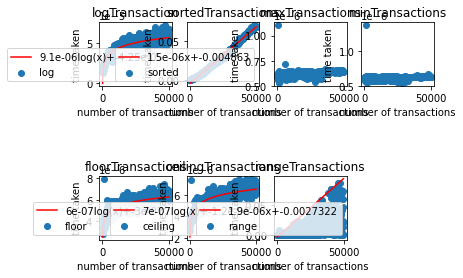

In [ ]:
#================================Additional Cell For Plotting========================================


import random
from datetime import timedelta
from datetime import datetime


class TransactionDataGenerator_A:
    def __init__(self):
        self.stockNames = ["Barclays"]
        self.minTradeValue = 500.00
        self.maxTradeValue = 100000.00
        self.startDate = datetime.strptime('1/1/2022 1:00:00', '%d/%m/%Y %H:%M:%S')
        random.seed(20221604)
          
    # returns the name of a traded stock at random
    def getStockName(self):
        return random.choice(self.stockNames)

    # returns the trade value of a transaction at random
    def getTradeValue(self):
        return round(random.uniform(self.minTradeValue, self.maxTradeValue), 2)
    
    # returns a list of N randomly generated transactions,
    # where each transaction is represented as a list [stock name, price, quantity, timestamp]
    # N : int
    def generateTransactionData(self, N):   
        listTransactions = [[]]*N
        listDates = [self.startDate + timedelta(seconds=3*x) for x in range(0, N)]
        listDatesFormatted = [x.strftime('%d/%m/%Y %H:%M:%S') for x in listDates]
        for i in range(N):
            stockName = random.choice(self.stockNames)
            price = round(random.uniform(50.00, 100.00), 2)
            quantity = random.randint(10,1000)
            listTransactions[i] = [stockName, price, quantity, listDatesFormatted[i]]   
        return listTransactions
        

import matplotlib.pyplot as plt
import timeit
import numpy as np 

testPlatform = StockTradingPlatform()
testDataGen = TransactionDataGenerator_A()

numTransactions = 1000000
testData = testDataGen.generateTransactionData(numTransactions)

numRuns = 100

print("Examples of transactions:", testData[0], testData[numTransactions//2], testData[numTransactions-1])

#
# testing the logTransaction() API 
#
x = []
y = []
ma = []
ma_floor = []
ma_ceiling = []
ma_range = []
ma_max = []
ma_min = []

a = 100
finaltime_sort = []
finaltime_max = []
finaltime_min = []
finaltime_floor = []
finaltime_ceiling = []
finaltime_range = []
finaltime_x = []
finaltime_maxx = []
finaltime_minx = []
finaltime_floorx = []
finaltime_ceilingx = []
finaltime_rangex = []
#function help to get upper and lower bound
def getBound(arr): 
    l1 = [arr[-1] + 2*np.std(arr, ddof = 1), arr[-1] - 2*np.std(arr, ddof = 1)] #[upper,lower]
    return l1

#get time
for j in range(1,50000):
    #test for time per log
    starttime = timeit.default_timer()
    testPlatform.logTransaction(testData[j])
    endtime = timeit.default_timer()
    finaltime = round(endtime-starttime,10)

    if j == a:
        #test and add time for other operations
        rangeValues = sorted([testDataGen.getTradeValue(), testDataGen.getTradeValue()])

        starttime = timeit.default_timer()
        for i in range(20):
            output = testPlatform.sortedTransactions(testDataGen.getStockName())
        endtime = timeit.default_timer()
        finaltime_sort.append(round((endtime-starttime)/20,10))

        starttime = timeit.default_timer()
        for i in range(10):
            testPlatform.maxTransactions("Barclays")
        endtime = timeit.default_timer()

        starttime = timeit.default_timer()
        for i in range(10):
            testPlatform.maxTransactions("Barclays")
        endtime = timeit.default_timer()
        finaltime_max.append(round((endtime-starttime)/10,10))
        finaltime_maxx.append(j)

        starttime = timeit.default_timer()
        for i in range(10):
            testPlatform.minTransactions("Barclays")
        endtime = timeit.default_timer()

        starttime = timeit.default_timer()
        for i in range(10):
            testPlatform.minTransactions("Barclays")
        endtime = timeit.default_timer()
        finaltime_min.append(round((endtime-starttime)/10,10))
        finaltime_minx.append(j)

        starttime = timeit.default_timer()
        output = testPlatform.ceilingTransactions("Barclays",  rangeValues[1])
        endtime = timeit.default_timer()
        
        starttime = timeit.default_timer()
        for i in range(20):
            output = testPlatform.ceilingTransactions("Barclays",  rangeValues[0])
        endtime = timeit.default_timer()
        finaltime_ceiling.append(round((endtime-starttime)/20,10))
        finaltime_ceilingx.append(j)

        starttime = timeit.default_timer()
        for i in range(20):
            output = testPlatform.floorTransactions("Barclays",  rangeValues[1])
        endtime = timeit.default_timer()
        finaltime_floor.append(round((endtime-starttime)/20,10))
        finaltime_floorx.append(j)
        
        starttime = timeit.default_timer()
        for i in range(20):
            output = testPlatform.rangeTransactions("Barclays", rangeValues[0], rangeValues[1])
        endtime = timeit.default_timer()
        finaltime_range.append(round((endtime-starttime)/20,10))
        finaltime_rangex.append(j)
        finaltime_x.append(j)

        a = a + 100
        if len(y) == 0:
            ma.append(0)
            ma_floor.append(0)
            ma_ceiling.append(0)
            ma_range.append(0)
            ma_max.append(0)
            ma_min.append(0)
            #ma_x.append(0)
        elif len(y) > 21:
            ma.append(sum(y[-20:-1])*10000000 / 19)  #create a moving average of 20
            ma_floor.append(sum(finaltime_floor[-20:-1])*10000000 / 19)
            ma_ceiling.append(sum(finaltime_ceiling[-20:-1])*10000000 / 19)
            ma_range.append(sum(finaltime_range[-20:-1])*10000000 / 19)
            #ma_x.append(j)
        if len(finaltime_min) > 9: #create a moving average of 9
            ma_max.append(sum(finaltime_max[-8:-1])*10000000 / 7)
            ma_min.append(sum(finaltime_min[-8:-1])*10000000 / 7)

        x.append(j)
        y.append(finaltime)
        if len(y) < 40:
            if finaltime > 0.00004: #method when there is no enough point for std and ma
                y.pop()
                x.pop()

    if len(ma) > 10 and len(y) > 21:
        #create bands for moving average
        #3 standard dveiation will be the maximum deviation
        bound_log = getBound(ma)
        currentval_log = y[-1] * 10000000
        bound_floor = getBound(ma_floor)
        currentval_floor = finaltime_floor[-1] * 10000000
        bound_ceiling = getBound(ma_ceiling)
        currentval_ceiling = finaltime_ceiling[-1] * 10000000
        bound_range = getBound(ma_range)
        currentval_range = finaltime_range[-1] * 10000000
        bound_max = getBound(ma_max)
        currentval_max = finaltime_max[-1] * 10000000
        bound_min = getBound(ma_min)
        currentval_min = finaltime_min[-1] * 10000000

        if currentval_log > bound_log[0] or currentval_log < bound_log[1]: #bound = [upper, lower]
            y.pop()
            x.pop()
        if currentval_floor > bound_floor[0] or currentval_floor < bound_floor[1]:
            finaltime_floor.pop()
            finaltime_floorx.pop()
        if currentval_ceiling > bound_ceiling[0] or currentval_ceiling < bound_ceiling[1]:
            finaltime_ceiling.pop()
            finaltime_ceilingx.pop()
        if currentval_max > bound_max[0] or currentval_max < bound_max[1]: #bound = [upper, lower]
            finaltime_max.pop()
            finaltime_maxx.pop()
        if currentval_min > bound_min[0] or currentval_min < bound_min[1]: #bound = [upper, lower]
            finaltime_min.pop()
            finaltime_minx.pop()
    elif len(ma_max) > 5:
        bound_max = getBound(ma_max)
        currentval_max = finaltime_max[-1] * 10000000
        bound_min = getBound(ma_min)
        currentval_min = finaltime_min[-1] * 10000000
        if currentval_max > bound_max[0] or currentval_max < bound_max[1]: #bound = [upper, lower]
            finaltime_max.pop()
            finaltime_maxx.pop()
        if currentval_min > bound_min[0] or currentval_min < bound_min[1]: #bound = [upper, lower]
            finaltime_min.pop()
            finaltime_minx.pop()

#plotting
 
#plotting scatter
plt.subplot(341)
plt.scatter(x , y)
plt.xlabel("number of transactions")
plt.ylabel("time taken")
plt.title('logTransaction')

plt.subplot(342)
plt.scatter(finaltime_x , finaltime_sort)
plt.xlabel("number of transactions")
plt.ylabel("time taken")
plt.title('sortedTransactions')

plt.subplot(343)
plt.scatter(finaltime_maxx , finaltime_max)
plt.xlabel("number of transactions")
plt.ylabel("time taken")
plt.title('maxTransactions')

plt.subplot(344)
plt.scatter(finaltime_minx , finaltime_min)
plt.xlabel("number of transactions")
plt.ylabel("time taken")
plt.title('minTransactions')

plt.subplot(349)
plt.scatter(finaltime_floorx , finaltime_floor)
plt.xlabel("number of transactions")
plt.ylabel("time taken")
plt.title('floorTransactions')

plt.subplot(3,4,10)
plt.scatter(finaltime_ceilingx , finaltime_ceiling)
plt.xlabel("number of transactions")
plt.ylabel("time taken")
plt.title('ceilingTransactions')

plt.subplot(3,4,11)
plt.scatter(finaltime_rangex , finaltime_range)
plt.xlabel("number of transactions")
plt.ylabel("time taken")
plt.title('rangeTransactions')

#find best fit lines
equation_log = np.polyfit(np.log(x), y, 1) 
equation_sort = np.polyfit(finaltime_x, finaltime_sort, 1) 
equation_floor = np.polyfit(np.log(finaltime_floorx), finaltime_floor, 1) 
equation_ceiling = np.polyfit(np.log(finaltime_ceilingx), finaltime_ceiling, 1) 
equation_range = np.polyfit(np.array(finaltime_rangex), finaltime_range, 1) 
#return k and c where y = kx + c
#1 means it is for linear equation

#plotting best fit lines

plt.subplot(341)
y = (equation_log[0] * np.log(np.array(x)) + equation_log[1]).tolist()
plt.plot(x, y, 'r')
k = round(equation_log[0],7)
c = round(equation_log[1],7)
equ = str(k) + 'log(x)+' + str(c)
plt.legend(labels = (equ,'log'), loc = 'lower right')

plt.subplot(342)
finaltime_sort = (equation_sort[0] * np.array(finaltime_x) + equation_sort[1]).tolist()
plt.plot(finaltime_x, finaltime_sort, 'r')
k = round(equation_sort[0],7)
c = round(equation_sort[1],7)
equ = str(k) + 'x+' + str(c)
plt.legend(labels = (equ,'sorted'), loc = 'lower right')

plt.subplot(349)
finaltime_floor = (equation_floor[0] * np.log(np.array(finaltime_floorx)) + equation_floor[1]).tolist()
plt.plot(finaltime_floorx, finaltime_floor, 'r')
k = round(equation_floor[0],7)
c = round(equation_floor[1],7)
equ = str(k) + 'log(x)+' + str(c)
plt.legend(labels = (equ,'floor'), loc = 'lower right')

plt.subplot(3,4,10)
finaltime_ceiling = (equation_ceiling[0] * np.log(np.array(finaltime_ceilingx)) + equation_ceiling[1]).tolist()
plt.plot(finaltime_ceilingx, finaltime_ceiling, 'r')
k = round(equation_ceiling[0],7)
c = round(equation_ceiling[1],7)
equ = str(k) + 'log(x)+' + str(c)
plt.legend(labels = (equ,'ceiling'), loc = 'lower right')

plt.subplot(3,4,11)
finaltime_range = (equation_range[0] *2.6* np.array(finaltime_rangex) + equation_range[1]).tolist()
plt.plot(finaltime_rangex, finaltime_range, 'r')
k = round(equation_range[0]*2.6,7)
c = round(equation_range[1],7)
equ = str(k) + 'x+' + str(c)
plt.legend(labels = (equ,'range'), loc = 'lower right')


plt.show()